In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Import of Kaggle dataset of married couples and their astrological aspects based on date of birth.  Data set was in tab-delimited CSV file, and consisted of 1,9522 rows, each row representing a couple.

In [2]:
couple_data = pd.read_csv('Resources/actual_data.csv',sep='\t')
couple_df  = couple_data
couple_df.head()

,Chart_A_Name,Chart_A_UTCDate,Chart_B_Name,Chart_B_UTCDate,Chart_A_LatLong,Chart_B_LatLong,B_Minus_A_AgeDifference_Years,A-B-MerCnjMer,A-B-MerSxtMer,A-B-MerSqrMer,...,A-B-CerCnjJun,A-B-CerSxtJun,A-B-CerSqrJun,A-B-CerTriJun,A-B-CerOppJun,A-B-CerCnjCer,A-B-CerSxtCer,A-B-CerSqrCer,A-B-CerTriCer,A-B-CerOppCer
0,15Pari10780,1911.03.09 09:50:40,15Pari10789,1911.04.01 21:20:00,48N49-2E19,48N49-2E19,0.064,,,,...,,,,,,,,,,
1,15Pari76,1880.03.10 10:50:40,15Pari77,1898.08.24 09:20:40,48N49-2E19,48N49-2E19,18.453,,,,...,,,,,,,,,,
2,14PRPari490,1884.04.06 02:52:24,14PRPari491,1886.09.08 20:39:28,47N54-1E54,48N07-5E07,2.422,,,,...,,,,,-0.1,,,,,
3,Bourg2385,1935.10.09 14:40:00,Bourg2386,1937.10.02 20:30:00,47N04-2E22,47N04-2E22,1.981,,,,...,,,,,,,,,,
4,Bourg1498,1893.06.27 19:50:40,Bourg1499,1900.10.11 11:20:40,48N49-2E19,47N04-2E22,7.289,,,,...,,,,,,,,,,


Cleaning Data - Data contained blanks which had to be filled with "0" so Machine Learning models can be applied to the dataset.

In [3]:
couple_df = couple_df.replace({" ":0})
couple_df.tail()

,Chart_A_Name,Chart_A_UTCDate,Chart_B_Name,Chart_B_UTCDate,Chart_A_LatLong,Chart_B_LatLong,B_Minus_A_AgeDifference_Years,A-B-MerCnjMer,A-B-MerSxtMer,A-B-MerSqrMer,...,A-B-CerCnjJun,A-B-CerSxtJun,A-B-CerSqrJun,A-B-CerTriJun,A-B-CerOppJun,A-B-CerCnjCer,A-B-CerSxtCer,A-B-CerSqrCer,A-B-CerTriCer,A-B-CerOppCer
19517,Bourg2538,1912.06.06 09:00:00,Bourg2539,1913.11.22 04:00:00,47N04-2E22,47N04-2E22,1.458,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19518,15Pari3873,1902.04.21 03:50:40,15Pari3874,1904.04.13 20:35:40,48N49-2E19,48N49-2E19,1.978,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19519,Bourg441,1933.11.29 11:00:00,Bourg442,1934.09.19 03:10:00,47N04-2E22,47N04-2E22,0.803,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19520,Lil4511,1897.09.21 02:50:40,Lil4514,1898.03.29 06:20:40,50N39-3E04,50N39-3E04,0.522,0,0,0,...,0,0,0,0,0,-0.7,0,0,0,0
19521,14PRPari4269,1899.05.28 10:50:40,14PRPari4270,1897.06.05 17:50:40,47N40-2W43,43N31-6E28,-1.978,0,0,0,...,0,0,4.6,0,0,0,0,0,0,0


Originally, the data contained approximately 405 possible dimensions to analyze.  In order to reduce the scope of analysis, we limited the dimensions to astrological aspects that only included the 9 planets of the solar system, and also focused on aspects that were favorable to a couples compatibility.  To this columns that signified "Square" and "Opposing" aspects were removed, and columns that included aseroids in the aspects.  This reduced the dimension to 110 from 405.  

In [4]:
updated_df = couple_df.loc[:,~couple_df.columns.str.contains('Sqr|Opp')]
updated_df2 = updated_df.loc[:,~updated_df.columns.str.contains('Nod|Jun|Cer')]
updated_df2.head()

,Chart_A_Name,Chart_A_UTCDate,Chart_B_Name,Chart_B_UTCDate,Chart_A_LatLong,Chart_B_LatLong,B_Minus_A_AgeDifference_Years,A-B-MerCnjMer,A-B-MerSxtMer,A-B-MerTriMer,...,A-B-SatTriSun,A-B-SatCnjMar,A-B-SatSxtMar,A-B-SatTriMar,A-B-SatCnjJup,A-B-SatSxtJup,A-B-SatTriJup,A-B-SatCnjSat,A-B-SatSxtSat,A-B-SatTriSat
0,15Pari10780,1911.03.09 09:50:40,15Pari10789,1911.04.01 21:20:00,48N49-2E19,48N49-2E19,0.064,0,0,0,...,0,0,0,0,0,0,0,-2.6,0,0
1,15Pari76,1880.03.10 10:50:40,15Pari77,1898.08.24 09:20:40,48N49-2E19,48N49-2E19,18.453,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14PRPari490,1884.04.06 02:52:24,14PRPari491,1886.09.08 20:39:28,47N54-1E54,48N07-5E07,2.422,0,0,6.1,...,0,0,0,0,0,0,3.2,0,0,0
3,Bourg2385,1935.10.09 14:40:00,Bourg2386,1937.10.02 20:30:00,47N04-2E22,47N04-2E22,1.981,0,0,0,...,0,0,-2.6,0,0,0,0,0,0,0
4,Bourg1498,1893.06.27 19:50:40,Bourg1499,1900.10.11 11:20:40,48N49-2E19,47N04-2E22,7.289,0,0,0,...,0,0,2.1,0,0,2.1,0,0,0,0


110 astrological aspects (X) were used as the dimensions to predict the age difference (y) of the couples in the dataset.  

In [5]:

X = updated_df2.iloc[:,7:]
y = updated_df2["B_Minus_A_AgeDifference_Years"].values.reshape(-1, 1)

print(X.shape, y.shape)


(19522, 108) (19522, 1)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.04221570634643956
Testing Score: 0.027826931427220147


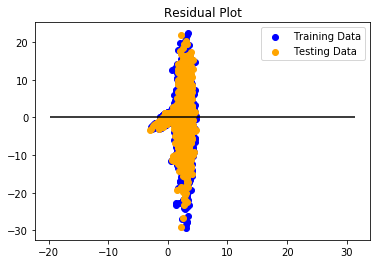

In [8]:
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION
# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
predicted

Mean Squared Error (MSE): 21.363844735469293
R-squared (R2 ): 0.027826931427220147


array([[2.6910407 ],
       [2.84955123],
       [2.7892331 ],
       ...,
       [3.16206018],
       [3.13367061],
       [1.25350357]])

In order to see if the R2 test score could be improved, and since our testing data for predicting y (Age difference in couples), was granular and to the thoundths place, a range was applied to give the model some flexibility.  A lower and upper range was applied, and as long as the predicted value fell within this range, it would be accepted.  A range of 1-year difference from the predicted value was applied.

Applying the range of 1 years variance, allowed us to get 1,198 as "True"/accurate predictions of age difference (out of 4,881 outcomes), bringing the prediction accuracy to 0.24544.  Although this value is and improvement from our orignal R2 value of 0.02782, it still indicates that there are a lot of outside factors that affect the age difference in couples, and that the planetary positions are not enough to predict this value.

In [10]:
ranges = []
for row in predicted:
    ranges.append([row[0]-1, row[0]+1])
    

In [11]:
y_test

array([[ 1.892],
       [ 6.322],
       [ 4.797],
       ...,
       [ 0.997],
       [ 5.189],
       [-0.272]])

In [12]:
y_test_temp = []
for row in y_test:
    y_test_temp.append(row[0])

In [13]:
scoring_df = pd.DataFrame({'Actual Value': y_test_temp, 'Prediction': ranges})
scoring_df.tail()

,Actual Value,Prediction
4876,11.736,"[2.222838023581227, 4.222838023581227]"
4877,0.778,"[-1.294759197774074, 0.705240802225926]"
4878,0.997,"[2.162060175718896, 4.162060175718896]"
4879,5.189,"[2.133670613535007, 4.133670613535007]"
4880,-0.272,"[0.2535035702782522, 2.2535035702782524]"


In [14]:
#Low-end Predict and Upper-end Predict
lower_range = []
for row in ranges:
    lower_range.append(row[0])

upper_range = []
for row in ranges:
    upper_range.append(row[1])

In [15]:
scoring_df = pd.DataFrame({'Actual Value': y_test_temp,'Lower Range': lower_range, 'Upper Range': upper_range})
scoring_df.head()

,Actual Value,Lower Range,Upper Range
0,1.892,1.691041,3.691041
1,6.322,1.849551,3.849551
2,4.797,1.789233,3.789233
3,1.472,1.998553,3.998553
4,0.136,-0.648180,1.351820


In [16]:
scoring_df['Actual Value'].dtype
scoring_df['Upper Range'].dtype

dtype('float64')

In [17]:
scoring_df['Score'] = (scoring_df['Actual Value'] >= scoring_df['Lower Range'])&( scoring_df['Actual Value'] <= scoring_df['Upper Range'])

In [29]:

scoring_df.describe()
scoring_df.tail()
updated_df=scoring_df.groupby(['Score']).count()
updated_df

,Actual Value,Lower Range,Upper Range
Score,,,
False,3683,3683,3683
True,1198,1198,1198


In [26]:
True_df = scoring_df[(scoring_df['Actual Value'] >= scoring_df['Lower Range']) & (scoring_df['Actual Value'] <= scoring_df['Upper Range'])]
True_df

,Actual Value,Lower Range,Upper Range,Score
0,1.892,1.691041,3.691041,True
4,0.136,-0.648180,1.351820,True
7,0.072,-0.237578,1.762422,True
9,3.158,2.186254,4.186254,True
22,2.872,1.973461,3.973461,True
23,0.367,-0.082727,1.917273,True
24,3.706,2.418625,4.418625,True
28,3.344,1.401939,3.401939,True
34,4.833,3.182950,5.182950,True
35,2.575,1.879948,3.879948,True
